In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import numpy as np
import pandas as pd
import copy

import math
import scipy.stats as stats

import datetime
from dateutil.relativedelta import relativedelta

import statsmodels.api as sm
from sklearn.linear_model import Ridge, Lasso, LassoCV
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima.model import ARIMA
!pip install pmdarima
import pmdarima
!pip install arch
from arch.univariate import ARX
from arch.univariate import GARCH

import matplotlib.pyplot as plt

Mounted at /content/drive/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 918.2/918.2 kB 24.3 MB/s eta 0:00:00


In [ ]:
# Import raw data

data_raw = pd.read_excel('drive/My Drive/Guzman Energy Interview/Assignment 3/Assignment 3 - timeseries_data.xlsx')
data_raw

,DATETIME,HB_NORTH (RTLMP),ERCOT (WIND_RTI),ERCOT (GENERATION_SOLAR_RT),ERCOT (RTLOAD),HOURENDING,MARKETDAY,PEAKTYPE,MONTH,YEAR
0,2017-01-01 01:00:00,23.3575,2155.31,0.00,29485.791355,1,2017-01-01,OFFPEAK,JANUARY,2017
1,2017-01-01 02:00:00,21.4650,2313.81,0.00,28911.565913,2,2017-01-01,OFFPEAK,JANUARY,2017
2,2017-01-01 03:00:00,20.7350,2587.68,0.00,28238.258175,3,2017-01-01,OFFPEAK,JANUARY,2017
3,2017-01-01 04:00:00,20.2700,2748.65,0.00,27821.000513,4,2017-01-01,OFFPEAK,JANUARY,2017
4,2017-01-01 05:00:00,20.1200,2757.49,0.00,27646.942413,5,2017-01-01,OFFPEAK,JANUARY,2017
...,...,...,...,...,...,...,...,...,...,...
14982,2018-09-17 08:00:00,20.8600,3195.52,2.04,41902.240000,8,2018-09-17,WDPEAK,SEPTEMBER,2018
14983,2018-09-17 09:00:00,22.7675,2605.50,111.59,43014.370000,9,2018-09-17,WDPEAK,SEPTEMBER,2018
14984,2018-09-17 10:00:00,31.0600,2034.80,261.65,45782.550000,10,2018-09-17,WDPEAK,SEPTEMBER,2018
14985,2018-09-17 11:00:00,29.6700,NaN,464.88,49431.130000,11,2018-09-17,WDPEAK,SEPTEMBER,2018


In [ ]:
# Check data completeness

for i in range(1, len(data_raw)): 
  for index in data_raw.columns[1:5]: 
    if np.isnan(data_raw[index].iloc[i]): 
      print(index)
      print(data_raw.iloc[i])
      print('-----')
  if not data_raw['DATETIME'].iloc[i-1] + relativedelta(hours = 1) == data_raw['DATETIME'].iloc[i]: 
    print('DATETIME')
    print(data_raw.iloc[i-1:i+1])
    print('-----')

DATETIME
                DATETIME  HB_NORTH (RTLMP)  ERCOT (WIND_RTI)  \
1681 2017-03-12 02:00:00           17.1925           7475.65   
1682 2017-03-12 04:00:00           17.2975           7146.66   

      ERCOT (GENERATION_SOLAR_RT)  ERCOT (RTLOAD)  HOURENDING  MARKETDAY  \
1681                         0.16    27896.942425           2 2017-03-12   
1682                         0.16    27114.657048           4 2017-03-12   

     PEAKTYPE  MONTH  YEAR  
1681  OFFPEAK  MARCH  2017  
1682  OFFPEAK  MARCH  2017  
-----
ERCOT (GENERATION_SOLAR_RT)
DATETIME                       2017-11-05 01:00:00
HB_NORTH (RTLMP)                           17.3375
ERCOT (WIND_RTI)                          13272.17
ERCOT (GENERATION_SOLAR_RT)                    NaN
ERCOT (RTLOAD)                        35745.976145
HOURENDING                                       1
MARKETDAY                      2017-11-05 00:00:00
PEAKTYPE                                   OFFPEAK
MONTH                                   

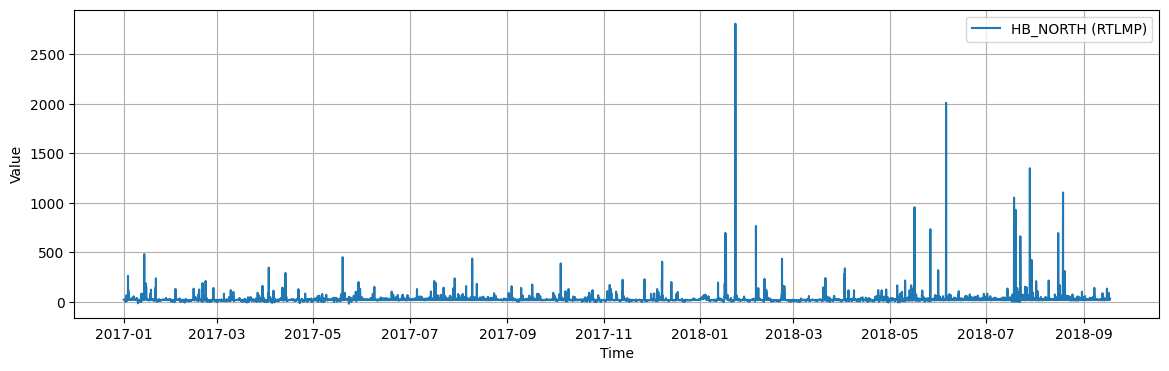

In [ ]:
plt.figure(figsize = (14, 4))
plt.xlabel("Time")
plt.ylabel("Value")
plt.plot(data_raw['DATETIME'], data_raw['HB_NORTH (RTLMP)'], label = 'HB_NORTH (RTLMP)')
plt.legend()
plt.grid()

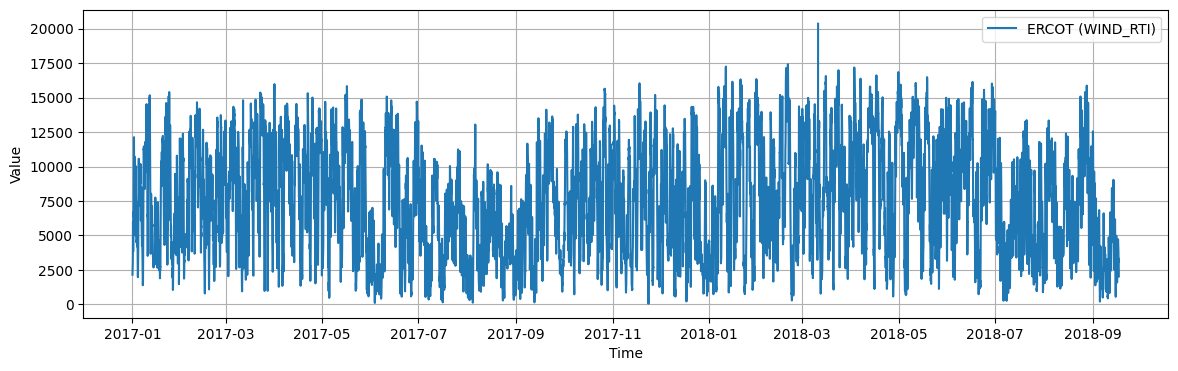

In [ ]:
plt.figure(figsize = (14, 4))
plt.xlabel("Time")
plt.ylabel("Value")
plt.plot(data_raw['DATETIME'], data_raw['ERCOT (WIND_RTI)'], label = 'ERCOT (WIND_RTI)')
plt.legend()
plt.grid()

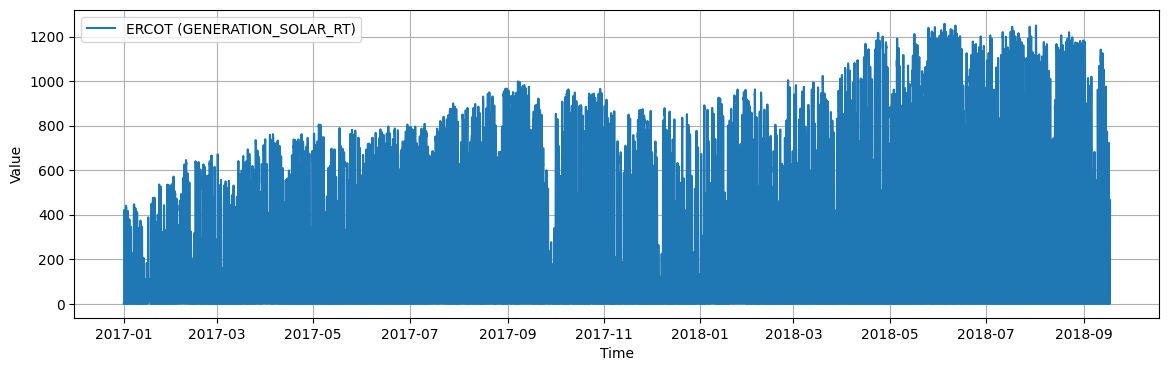

In [ ]:
plt.figure(figsize = (14, 4))
plt.xlabel("Time")
plt.ylabel("Value")
plt.plot(data_raw['DATETIME'], data_raw['ERCOT (GENERATION_SOLAR_RT)'], label = 'ERCOT (GENERATION_SOLAR_RT)')
plt.legend()
plt.grid()

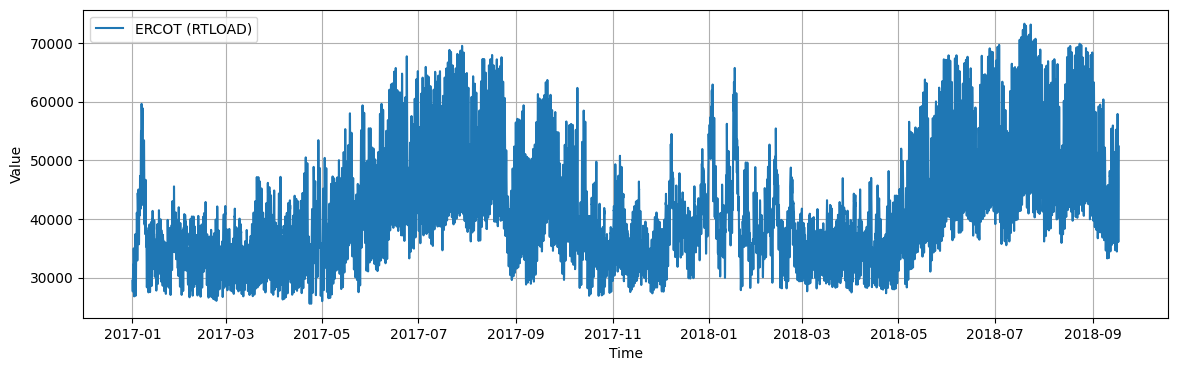

In [ ]:
plt.figure(figsize = (14, 4))
plt.xlabel("Time")
plt.ylabel("Value")
plt.plot(data_raw['DATETIME'], data_raw['ERCOT (RTLOAD)'], label = 'ERCOT (RTLOAD)')
plt.legend()
plt.grid()

In [ ]:
# Use ffill (instead of interpolation) to replace np.nan and outliers for forecast models

data = data_raw.copy()
# Length of moving window
k = 31
for index in ['HB_NORTH (RTLMP)', 'ERCOT (WIND_RTI)', 'ERCOT (GENERATION_SOLAR_RT)', 'ERCOT (RTLOAD)']: 
  # Calculate moving std and moving mean; use hollow neighborhood
  calculation1 = pd.DataFrame()
  calculation1['std'] = data[index].rolling(k//2).std()
  calculation1['mean'] = data[index].rolling(k//2).mean()
  calculation1 = calculation1.shift(1)
  calculation1['std'].iloc[:(k//2)] = 1
  calculation1['std'].iloc[-(k//2):] = 1

  calculation2 = pd.DataFrame()
  calculation2['std'] = data[index].rolling(k//2).std()
  calculation2['mean'] = data[index].rolling(k).mean()
  calculation2 = calculation2.shift(-(k//2))
  calculation2['std'].iloc[:(k//2)] = 1
  calculation2['std'].iloc[-(k//2):] = 1

  calculation = pd.DataFrame()
  calculation['5std'] = 5 * (((calculation1['std']**2)*(k//2-1) + (calculation2['std']**2)*(k//2-1)) / (k//2*2-1)) ** 0.5
  calculation['mean'] = (calculation1['mean'] + calculation2['mean']) / 2

  # Consider a point to be an outlier if deviate more than 5 * std from mean
  data[index+' abs'] = abs(data[index] - calculation['mean'])
  data[index+' outlier'] = data[index+' abs'] > calculation['5std']
  data[index+' outlier'].iloc[:(k//2)] = False
  data[index+' outlier'].iloc[-(k//2):] = False
  data.drop([index+' abs'], axis=1, inplace = True)

  print(len(data[data[index+' outlier']].index))
  print(data[data[index+' outlier']].index)

  # Drop and ffill outliers
  for i in data[data[index+' outlier']].index: 
    data[index].iloc[i] = np.nan

data.ffill(inplace = True)

169
Int64Index([   41,    65,   198,   270,   312,   337,   414,   489,   642,
              786,
            ...
            13935, 14053, 14198, 14220, 14271, 14295, 14506, 14747, 14938,
            14965],
           dtype='int64', length=169)
0
Int64Index([], dtype='int64')
0
Int64Index([], dtype='int64')
0
Int64Index([], dtype='int64')


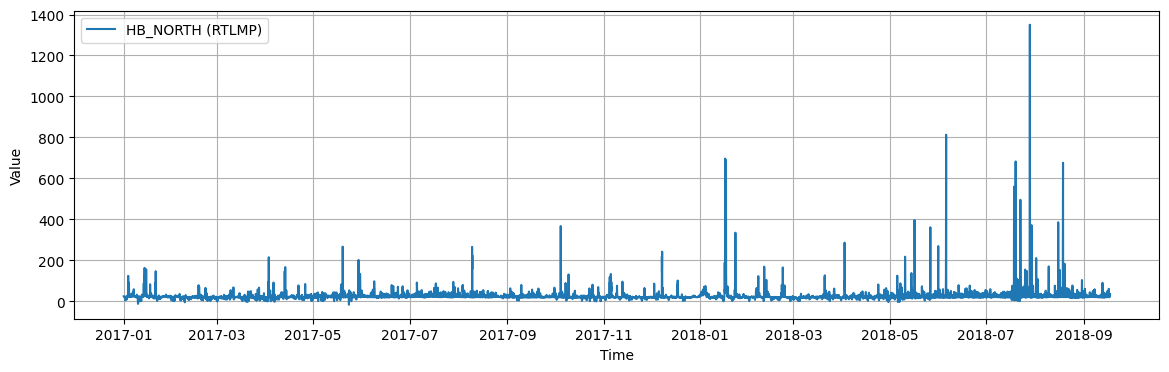

In [ ]:
# Data without outliers

plt.figure(figsize = (14, 4))
plt.xlabel("Time")
plt.ylabel("Value")
plt.plot(data['DATETIME'], data['HB_NORTH (RTLMP)'], label = 'HB_NORTH (RTLMP)')
plt.legend()
plt.grid()

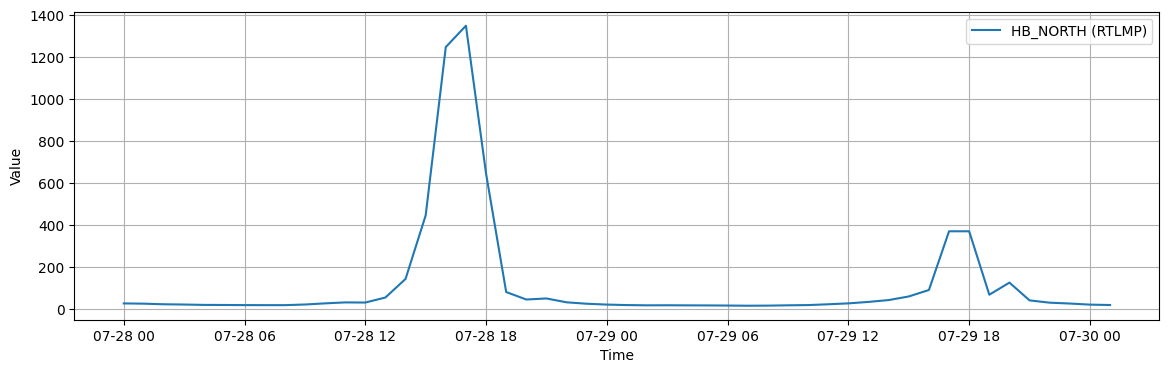

In [ ]:
plt.figure(figsize = (14, 4))
plt.xlabel("Time")
plt.ylabel("Value")
plt.plot(data['DATETIME'].iloc[13750:13800], data['HB_NORTH (RTLMP)'].iloc[13750:13800], label = 'HB_NORTH (RTLMP)')
plt.legend()
plt.grid()

In [ ]:
# Add PEAKTYPE as label type variable
print(list(set(data['PEAKTYPE'].values.tolist())))
data['WEPEAK'] = 0
data['WEPEAK'] = data['WEPEAK'] + (data['PEAKTYPE'] == 'WEPEAK' * 1)
data['WDPEAK'] = 0
data['WDPEAK'] = data['WDPEAK'] + (data['PEAKTYPE'] == 'WDPEAK' * 1)

# Split data into train set and test set
data_train = data.iloc[:12000]
data_test = data.iloc[12000:]

['WDPEAK', 'OFFPEAK', 'WEPEAK']


In [ ]:
# OLS with WIND_RTI， GENERATION_SOLAR_RT, RTLOAD， WEPEAK, WDPEAK
# GENERATION_SOLAR_RT is not useful

# Use lag 1 term of x
y = data_train['HB_NORTH (RTLMP)'].iloc[1:]
y.index = [i for i in range(len(y))]
x = data_train[['ERCOT (WIND_RTI)', 'ERCOT (GENERATION_SOLAR_RT)', 'ERCOT (RTLOAD)', 'WEPEAK', 'WDPEAK']].iloc[:len(data_train)-1]
x = sm.add_constant(x)
x.index = [i for i in range(len(x))]
model = sm.OLS(y, x).fit()
print('BIC: ', model.bic)
print(model.summary())

BIC:  102313.1803647107
                            OLS Regression Results                            
Dep. Variable:       HB_NORTH (RTLMP)   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     421.5
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        15:12:11   Log-Likelihood:                -51128.
No. Observations:               11999   AIC:                         1.023e+05
Df Residuals:                   11993   BIC:                         1.023e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [ ]:
# OLS with WIND_RTI， RTLOAD， WEPEAK, WDPEAK
# BIC is lower; maybe further drop WEPEAK

# Use lag 1 term of x
y = data_train['HB_NORTH (RTLMP)'].iloc[1:]
y.index = [i for i in range(len(y))]
x = data_train[['ERCOT (WIND_RTI)', 'ERCOT (RTLOAD)', 'WEPEAK', 'WDPEAK']].iloc[:len(data_train)-1]
x = sm.add_constant(x)
x.index = [i for i in range(len(x))]
model = sm.OLS(y, x).fit()
print('BIC: ', model.bic)
print(model.summary())

BIC:  102303.85897783123
                            OLS Regression Results                            
Dep. Variable:       HB_NORTH (RTLMP)   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     526.9
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        15:12:11   Log-Likelihood:                -51128.
No. Observations:               11999   AIC:                         1.023e+05
Df Residuals:                   11994   BIC:                         1.023e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const          

In [ ]:
# OLS with WIND_RTI， RTLOAD， WDPEAK
# BIC is lower; WDPEAK might not be useful

# Use lag 1 term of x
y = data_train['HB_NORTH (RTLMP)'].iloc[1:]
y.index = [i for i in range(len(y))]
x = data_train[['ERCOT (WIND_RTI)', 'ERCOT (RTLOAD)', 'WDPEAK']].iloc[:len(data_train)-1]
x = sm.add_constant(x)
x.index = [i for i in range(len(x))]
model = sm.OLS(y, x).fit()
print('BIC: ', model.bic)
print(model.summary())

BIC:  102299.94927957348
                            OLS Regression Results                            
Dep. Variable:       HB_NORTH (RTLMP)   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     700.4
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        15:12:11   Log-Likelihood:                -51131.
No. Observations:               11999   AIC:                         1.023e+05
Df Residuals:                   11995   BIC:                         1.023e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const          

In [ ]:
# OLS with WIND_RTI， RTLOAD
# BIC is lower

# Use lag 1 term of x
y = data_train['HB_NORTH (RTLMP)'].iloc[1:]
y.index = [i for i in range(len(y))]
x = data_train[['ERCOT (WIND_RTI)', 'ERCOT (RTLOAD)']].iloc[:len(data_train)-1]
x = sm.add_constant(x)
x.index = [i for i in range(len(x))]
model = sm.OLS(y, x).fit()
print('BIC: ', model.bic)
print(model.summary())

BIC:  102293.4561525034
                            OLS Regression Results                            
Dep. Variable:       HB_NORTH (RTLMP)   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     1049.
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        15:12:11   Log-Likelihood:                -51133.
No. Observations:               11999   AIC:                         1.023e+05
Df Residuals:                   11996   BIC:                         1.023e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const           

In [ ]:
# Lasso with WIND_RTI， GENERATION_SOLAR_RT, RTLOAD， WEPEAK, WDPEAK
# Lasso also suggests only using WIND_RTI and RTLOAD

# Use lag 1 term of x
y = data_train['HB_NORTH (RTLMP)'].iloc[1:]
y.index = [i for i in range(len(y))]
x = data_train[['ERCOT (WIND_RTI)', 'ERCOT (GENERATION_SOLAR_RT)', 'ERCOT (RTLOAD)', 'WEPEAK', 'WDPEAK']].iloc[:len(data_train)-1]
x = sm.add_constant(x)
x.index = [i for i in range(len(x))]
model = LassoCV()
model.fit(x, y)
print(x.columns)
print(model.coef_)

Index(['const', 'ERCOT (WIND_RTI)', 'ERCOT (GENERATION_SOLAR_RT)',
       'ERCOT (RTLOAD)', 'WEPEAK', 'WDPEAK'],
      dtype='object')
[ 0.         -0.00069402  0.          0.00062685  0.          0.        ]


In [39]:
# Choose OLS with WIND_RTI， RTLOAD

# Use lag 1 term of x
y = data_train['HB_NORTH (RTLMP)'].iloc[1:]
y.index = [i for i in range(len(y))]
x = data_train[['ERCOT (WIND_RTI)', 'ERCOT (RTLOAD)']].iloc[:len(data_train)-1]
x = sm.add_constant(x)
x.index = [i for i in range(len(x))]
model = sm.OLS(y, x).fit()
model_OLS = model
res_OLS = pd.DataFrame(model_OLS.resid, columns=["Residual"])

Text(0.5, 1.0, 'OLS Residual')

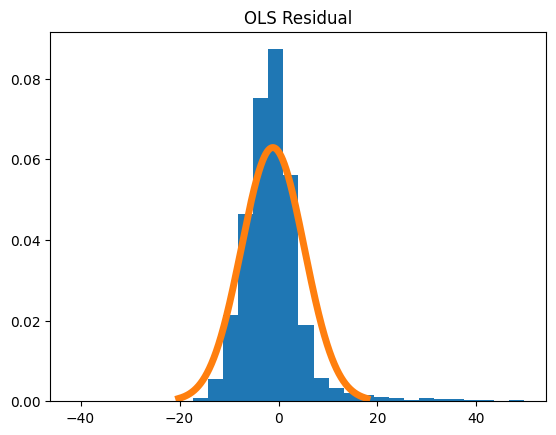

In [ ]:
# Compare distribution of OLS residual with normal distribution

res = res_OLS[abs(res_OLS['Residual']) < 50]
res.hist(density = True, bins = 30)
mu = res.mean()
sigma = res.std()
normx = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 2419)
plt.plot(normx, stats.norm.pdf(normx, mu, sigma), linewidth = 5)
plt.grid()
plt.title("OLS Residual")

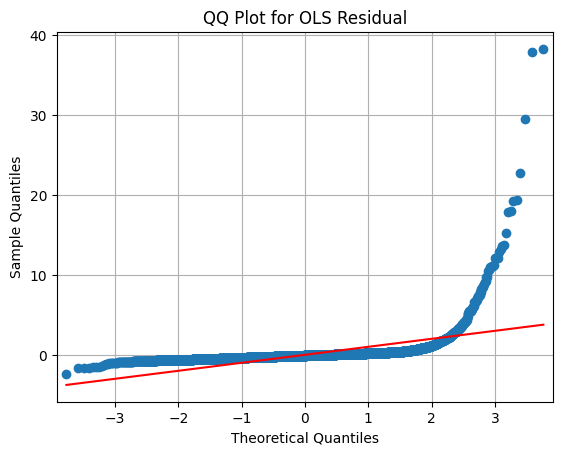

In [ ]:
# Check if OLS residual is normal distributed
# OLS residual is not really normal distributed

res = res_OLS.copy()
order = res.T.values.argsort()[0]
resSorted = res.T[order].T
sm.qqplot(resSorted, fit = True, line = 's')
plt.title('QQ Plot for OLS Residual')
plt.grid()
plt.show()

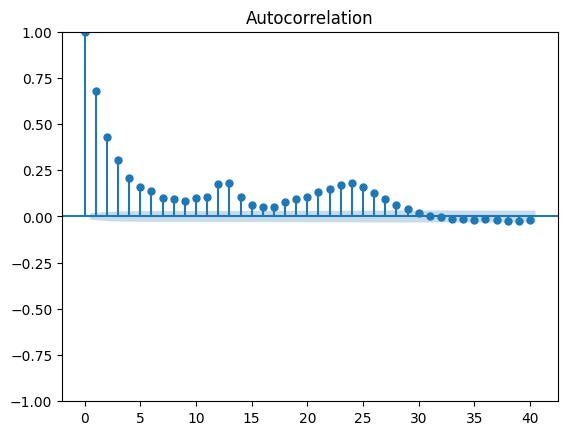

In [ ]:
price = data_train['HB_NORTH (RTLMP)'].iloc[1:]
price.index = [i for i in range(len(price))]

# ACF and PACF shows evidence of ARMA process
plot_acf(price, lags = 40)
plt.show()

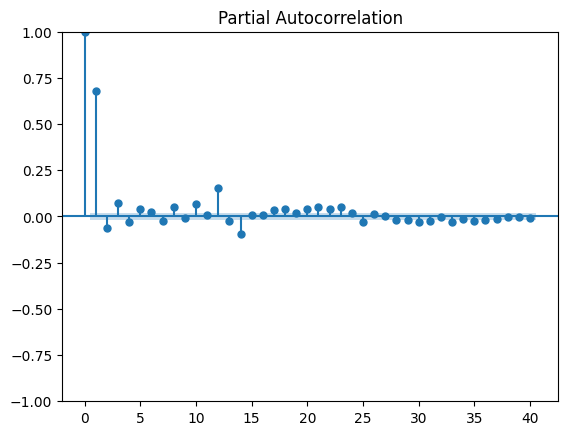

In [ ]:
plot_pacf(price, lags = 40)
plt.show()

In [ ]:
# If ADF rejected, stationary
# If KPSS rejected, non-stationary
# Price process is stationary

test = adfuller(price)
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])

test = kpss(price)
print('KPSS Statistic: %f' % test[0])
print('p-value: %f' % test[1])

ADF Statistic: -15.558804
p-value: 0.000000
KPSS Statistic: 0.289299
p-value: 0.100000


In [ ]:
# Auto choose p, q for ARMA, and check if there is seasonality, according to BIC
# Choose ARMA without seasonality

pmdarima.auto_arima(price, max_p=4, max_q=4, d=2, seasonal=True, information_criterion="bic", trace=True)

Performing stepwise search to minimize bic
 ARIMA(2,2,2)(0,0,0)[0]             : BIC=inf, Time=37.92 sec
 ARIMA(0,2,0)(0,0,0)[0]             : BIC=108341.560, Time=0.34 sec
 ARIMA(1,2,0)(0,0,0)[0]             : BIC=105522.937, Time=0.55 sec
 ARIMA(0,2,1)(0,0,0)[0]             : BIC=inf, Time=2.42 sec
 ARIMA(2,2,0)(0,0,0)[0]             : BIC=103325.338, Time=0.60 sec
 ARIMA(3,2,0)(0,0,0)[0]             : BIC=102484.252, Time=0.70 sec
 ARIMA(4,2,0)(0,0,0)[0]             : BIC=101740.432, Time=0.89 sec
 ARIMA(4,2,1)(0,0,0)[0]             : BIC=inf, Time=15.09 sec
 ARIMA(3,2,1)(0,0,0)[0]             : BIC=inf, Time=15.03 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : BIC=101749.825, Time=2.77 sec

Best model:  ARIMA(4,2,0)(0,0,0)[0]          
Total fit time: 76.320 seconds


ARIMA(order=(4, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# According to BIC, choose ARMA(3,2)
# Lower BIC than OLS

AIC_values = []
BIC_values = []
models = []
for p in range(5): 
  for q in range(3): 
    for d in [0]: 
      if not (p == 0 and q == 0):
        model = ARIMA(price.values, order=(p,d,q)).fit()
        AIC_values.append(model.aic)
        BIC_values.append(model.bic)
        models.append('ARIMA('+str(p)+','+str(d)+','+str(q)+')')

model_selection = pd.DataFrame(np.array([models, AIC_values, BIC_values]).T, columns = ["model", "AIC", "BIC"])
print(model_selection)

AIC_values = []
BIC_values = []
models = []
for p in [3]: 
  for q in range(5): 
    for d in [0]: 
      if not (p == 0 and q == 0):
        model = ARIMA(price.values, order=(p,d,q)).fit()
        AIC_values.append(model.aic)
        BIC_values.append(model.bic)
        models.append('ARIMA('+str(p)+','+str(d)+','+str(q)+')')

model_selection = pd.DataFrame(np.array([models, AIC_values, BIC_values]).T, columns = ["model", "AIC", "BIC"])
print(model_selection)

AIC_values = []
BIC_values = []
models = []
for p in [3]: 
  for q in [2]: 
    for d in range(3): 
      if not (p == 0 and q == 0):
        model = ARIMA(price.values, order=(p,d,q)).fit()
        AIC_values.append(model.aic)
        BIC_values.append(model.bic)
        models.append('ARIMA('+str(p)+','+str(d)+','+str(q)+')')

model_selection = pd.DataFrame(np.array([models, AIC_values, BIC_values]).T, columns = ["model", "AIC", "BIC"])
print(model_selection)

           model                AIC                BIC
0   ARIMA(0,0,1)  98537.01243436243  98559.19017013833
1   ARIMA(0,0,2)  97451.28882101348  97480.85913538134
2   ARIMA(1,0,0)  96733.94433927539  96756.12207505129
3   ARIMA(1,0,1)  96676.28292638012  96705.85324074798
4   ARIMA(1,0,2)  96619.99206910688  96656.95496206671
5   ARIMA(2,0,0)  96688.52530665911  96718.09562102697
6   ARIMA(2,0,1)  96634.66611517011  96671.62900812994
7   ARIMA(2,0,2)  96619.71847099042   96664.0739425422
8   ARIMA(3,0,0)  96630.63763284819  96667.60052580801
9   ARIMA(3,0,1)   96618.8325280318  96663.18799958358
10  ARIMA(3,0,2)  96509.03208598161  96560.78013612537
11  ARIMA(4,0,0)  96623.70659707682   96668.0620686286
12  ARIMA(4,0,1)  96620.01676550534  96671.76481564909
13  ARIMA(4,0,2)  96502.38214188405  96561.52277061976
          model                AIC                BIC
0  ARIMA(3,0,0)  96630.63763284819  96667.60052580801
1  ARIMA(3,0,1)   96618.8325280318  96663.18799958358
2  ARIMA(3,0,

In [ ]:
# Train ARMA(3,2) model

model_ARMA = ARIMA(price.values, order=(3,0,2)).fit()
print(model_ARMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                11999
Model:                 ARIMA(3, 0, 2)   Log Likelihood              -48247.516
Date:                Sun, 21 May 2023   AIC                          96509.032
Time:                        15:14:20   BIC                          96560.780
Sample:                             0   HQIC                         96526.391
                              - 11999                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5850      0.654     34.547      0.000      21.304      23.866
ar.L1         -0.9369      0.008   -114.344      0.000      -0.953      -0.921
ar.L2          0.3031      0.006     52.972      0.0

Text(0.5, 1.0, 'ARMA(3,2)')

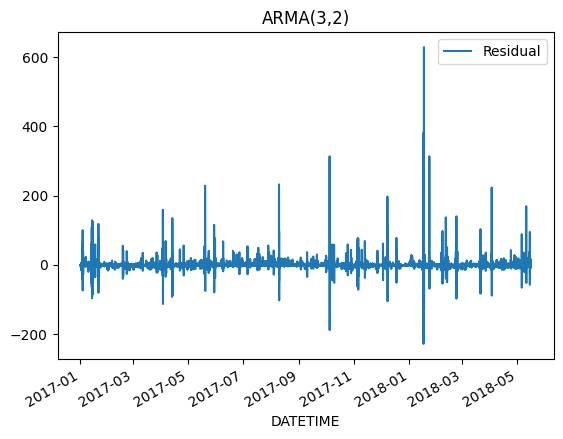

In [ ]:
# Check the residual of ARMA model

res_ARMA = pd.DataFrame(model_ARMA.resid, columns=["Residual"])
res_ARMA.index = data_train['DATETIME'][1:]
res_ARMA.plot()
plt.title("ARMA(3,2)")

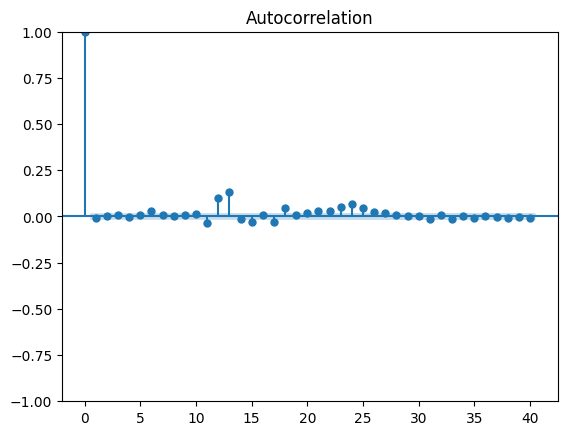

In [ ]:
# No evidence of AR or MA process for ARMA residual; model is effective

plot_acf(res_ARMA, lags=40)
plt.show()

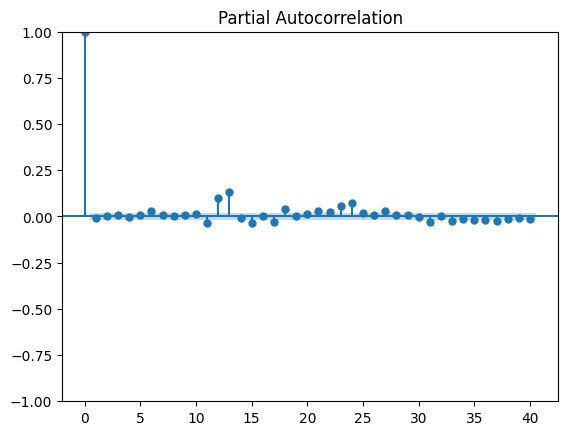

In [ ]:
plot_pacf(res_ARMA, lags=40)
plt.show()

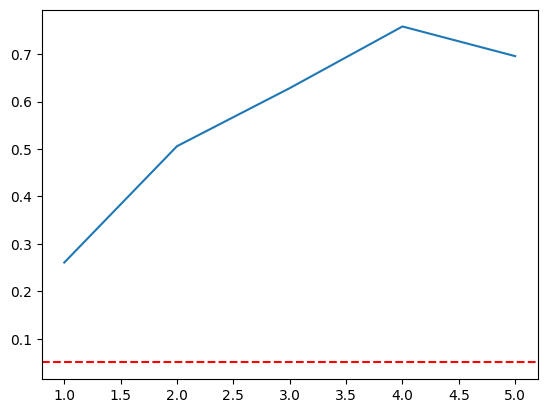

In [ ]:
# Ljung-Box rejected; no evidence of auto-correlation for ARMA residual; model is effective

lags = math.floor(np.log(len(res_ARMA)))
plt.plot(sm.stats.acorr_ljungbox(res_ARMA.values, 5)['lb_pvalue'])
plt.axhline(y=0.05, color='r', ls='--')

Text(0.5, 1.0, 'ARMA Residual')

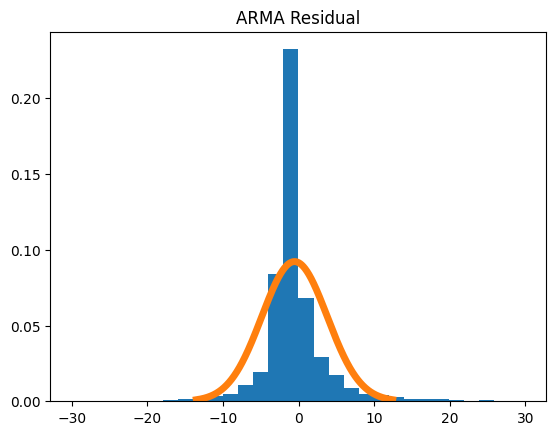

In [ ]:
# Compare distribution of ARMA residual with normal distribution
# Less residual than OLS model

res = res_ARMA[abs(res_ARMA['Residual']) < 30]
res.hist(density = True, bins = 30)
mu = res.mean()
sigma = res.std()
normx = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 2419)
plt.plot(normx, stats.norm.pdf(normx, mu, sigma), linewidth = 5)
plt.grid()
plt.title("ARMA Residual")

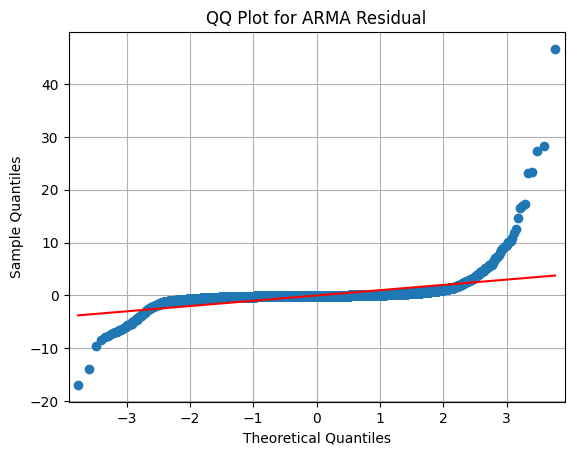

In [ ]:
# Check if ARMA residual is normal distributed
# ARMA residual is more normal distributed than OLS

res = res_ARMA.copy()
res.index = [i for i in range(len(res))]
order = res.T.values.argsort()[0]
resSorted = res.T[order].T
sm.qqplot(resSorted, fit = True, line = 's')
plt.title('QQ Plot for ARMA Residual')
plt.grid()
plt.show()

In [ ]:
# Train ARMAX(3,2) model with WIND_RTI and RTLOAD
# Higher BIC

# Use lag 1 term of x
x = data_train[['ERCOT (WIND_RTI)', 'ERCOT (RTLOAD)']].iloc[:len(data_train)-1]
x.index = [i for i in range(len(x))]
model_ARMAX = sm.tsa.SARIMAX(price, x, order=(3,0,2), trend='c').fit()
print(model_ARMAX.summary())

                               SARIMAX Results                                
Dep. Variable:       HB_NORTH (RTLMP)   No. Observations:                11999
Model:               SARIMAX(3, 0, 2)   Log Likelihood              -52085.203
Date:                Sun, 21 May 2023   AIC                         104188.407
Time:                        15:15:35   BIC                         104254.940
Sample:                             0   HQIC                        104210.725
                              - 11999                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            0.0367      0.583      0.063      0.950      -1.107       1.180
ERCOT (WIND_RTI)    -0.0008   3.77e-05    -20.979      0.000      -0.001      -0.001
ERCOT (RTLOAD)       0.0007 

In [ ]:
# Try ARX-GARCH model
# According to BIC, choose ARX(3)-GARCH(2,0)

AIC_values = []
BIC_values = []
models = []
for p in range(1, 4): 
  for q in range(3): 
    model = ARX(price, x, lags=3)
    model.volatility = GARCH(p,0,q)
    model = model.fit(update_freq = 0)
    AIC_values.append(model.aic)
    BIC_values.append(model.bic)
    models.append('ARX(3)-GARCH('+str(p)+','+str(q)+')')

model_selection = pd.DataFrame(np.array([models, AIC_values, BIC_values]).T, columns = ["model", "AIC", "BIC"])
print(model_selection)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 40955.07469144915
            Iterations: 78
            Function evaluations: 797
            Gradient evaluations: 78
Optimization terminated successfully    (Exit mode 0)
            Current function value: 40630.22353807643
            Iterations: 60
            Function evaluations: 676
            Gradient evaluations: 60
Optimization terminated successfully    (Exit mode 0)
            Current function value: 40630.223606938394
            Iterations: 55
            Function evaluations: 678
            Gradient evaluations: 55
Iteration limit reached    (Exit mode 9)
            Current function value: 40628.44521944983
            Iterations: 100
            Function evaluations: 1197
            Gradient evaluations: 96


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:756: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Optimization terminated successfully    (Exit mode 0)
            Current function value: 40628.34932511141
            Iterations: 74
            Function evaluations: 879
            Gradient evaluations: 73
Optimization terminated successfully    (Exit mode 0)
            Current function value: 40628.35358464916
            Iterations: 68
            Function evaluations: 914
            Gradient evaluations: 66
Optimization terminated successfully    (Exit mode 0)
            Current function value: 40628.2336668763
            Iterations: 56
            Function evaluations: 716
            Gradient evaluations: 55
Iteration limit reached    (Exit mode 9)
            Current function value: 40627.631069733325
            Iterations: 100
            Function evaluations: 1459
            Gradient evaluations: 97


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:756: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Optimization terminated successfully    (Exit mode 0)
            Current function value: 40628.234081594645
            Iterations: 64
            Function evaluations: 920
            Gradient evaluations: 64
               model                AIC                BIC
0  ARX(3)-GARCH(1,0)   81926.1493828983  81985.28801121724
1  ARX(3)-GARCH(1,1)  81278.44707615286  81344.97803301169
2  ARX(3)-GARCH(1,2)  81280.44721387679  81354.37049927548
3  ARX(3)-GARCH(2,0)  81274.89043889966  81341.42139575849
4  ARX(3)-GARCH(2,1)  81276.69865022282  81350.62193562152
5  ARX(3)-GARCH(2,2)  81278.70716929832  81360.02278323687
6  ARX(3)-GARCH(3,0)   81276.4673337526   81350.3906191513
7  ARX(3)-GARCH(3,1)  81277.26213946665   81358.5777534052
8  ARX(3)-GARCH(3,2)  81280.46816318929  81369.17610566772


In [ ]:
# Train ARX(3)-GARCH(2,0) model with ERCOT (WIND_RTI) and ERCOT (RTLOAD)
# ERCOT (WIND_RTI) is not very useful

model_GARCH = ARX(price, x, lags=3)
model_GARCH.volatility = GARCH(2,0,0)
model_GARCH = model_GARCH.fit(update_freq = 0)
print(model_GARCH.summary())

Iteration limit reached    (Exit mode 9)
            Current function value: 40628.44521944983
            Iterations: 100
            Function evaluations: 1197
            Gradient evaluations: 96
                          AR-X - ARCH Model Results                           
Dep. Variable:       HB_NORTH (RTLMP)   R-squared:                       0.291
Mean Model:                      AR-X   Adj. R-squared:                  0.291
Vol Model:                       ARCH   Log-Likelihood:               -40628.4
Distribution:                  Normal   AIC:                           81274.9
Method:            Maximum Likelihood   BIC:                           81341.4
                                        No. Observations:                11996
Date:                Sun, May 21 2023   Df Residuals:                    11990
Time:                        15:15:37   Df Model:                            6
                                     Mean Model                                    
      

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:756: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [ ]:
# Train ARX(3)-GARCH(2,0) model with ERCOT (RTLOAD)
# BIC is lower

model_GARCH = ARX(price, x['ERCOT (RTLOAD)'], lags=3)
model_GARCH.volatility = GARCH(2,0,0)
model_GARCH = model_GARCH.fit(update_freq = 0)
print(model_GARCH.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 40632.88495052859
            Iterations: 74
            Function evaluations: 756
            Gradient evaluations: 73
                          AR-X - ARCH Model Results                           
Dep. Variable:       HB_NORTH (RTLMP)   R-squared:                       0.284
Mean Model:                      AR-X   Adj. R-squared:                  0.283
Vol Model:                       ARCH   Log-Likelihood:               -40632.9
Distribution:                  Normal   AIC:                           81281.8
Method:            Maximum Likelihood   BIC:                           81340.9
                                        No. Observations:                11996
Date:                Sun, May 21 2023   Df Residuals:                    11991
Time:                        15:15:38   Df Model:                            5
                                   Mean Model                                  

Text(0.5, 1.0, 'ARX(3)-GARCH(2,0)')

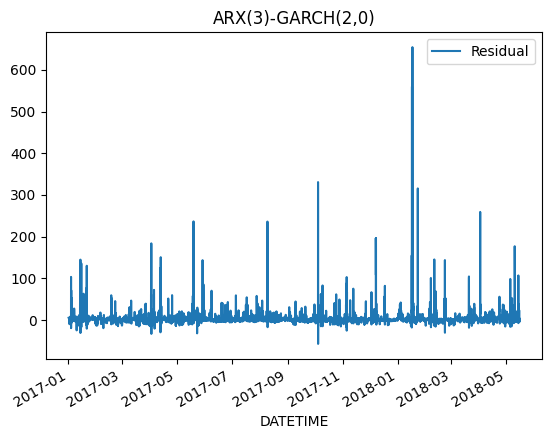

In [ ]:
# Check the residual of GARCH model

res_GARCH = pd.DataFrame(model_GARCH.resid.values)
res_GARCH.columns = ['Residual']
res_GARCH.index = data_train['DATETIME'][1:]
res_GARCH.plot()
plt.title("ARX(3)-GARCH(2,0)")

Text(0.5, 1.0, 'GARCH Residual')

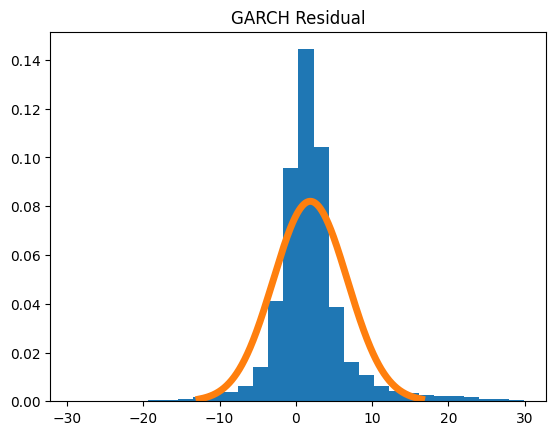

In [ ]:
# Compare distribution of GARCH residual with normal distribution
# Less residual than OLS model

res = res_GARCH[abs(res_GARCH['Residual']) < 30]
res.hist(density = True, bins = 30)
mu = res.mean()
sigma = res.std()
normx = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 2419)
plt.plot(normx, stats.norm.pdf(normx, mu, sigma), linewidth = 5)
plt.grid()
plt.title("GARCH Residual")

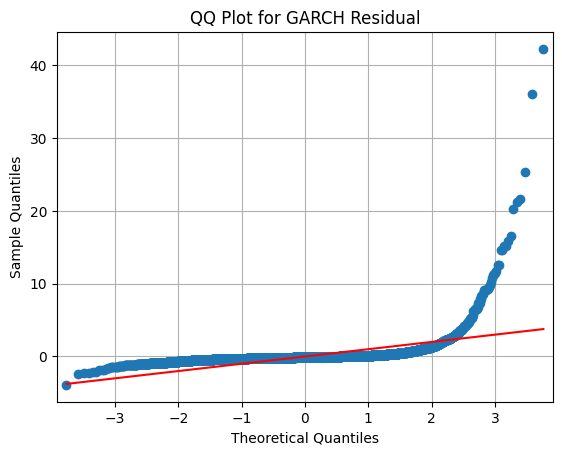

In [ ]:
# Check if GARCH residual is normal distributed
# GARCH residual is more normal distributed than OLS

res = res_GARCH.iloc[3:].copy()
res.index = [i for i in range(len(res))]
order = res.T.values.argsort()[0]
resSorted = res.T[order].T
sm.qqplot(resSorted, fit = True, line = 's')
plt.title('QQ Plot for GARCH Residual')
plt.grid()
plt.show()

In [ ]:
# Make predictions on test set using OLS, ARMA, and GARCH models

y_test = data_test['HB_NORTH (RTLMP)'].iloc[1:]
y_test.index = [i for i in range(len(y_test))]
x_test = data_test[['ERCOT (WIND_RTI)', 'ERCOT (RTLOAD)']].iloc[:len(data_test)-1]
x_test.index = [i for i in range(len(x_test))]

y_forecast_OLS = model_OLS.get_prediction(sm.add_constant(x_test))
y_pred_OLS = y_forecast_OLS.predicted_mean
y_std_OLS = y_forecast_OLS.var_pred_mean ** 0.5

y_pred_ARMA = model_ARMA.predict(len(price), len(price)+len(x_test)-1)

y_forecast_GARCH = model_GARCH.forecast(horizon=len(x_test), x=x_test['ERCOT (RTLOAD)'])
y_pred_GARCH = y_forecast_GARCH.mean.iloc[len(y_forecast_GARCH.mean)-1]
y_std_GARCH = y_forecast_GARCH.variance.iloc[len(y_forecast_GARCH.variance)-1] ** 0.5

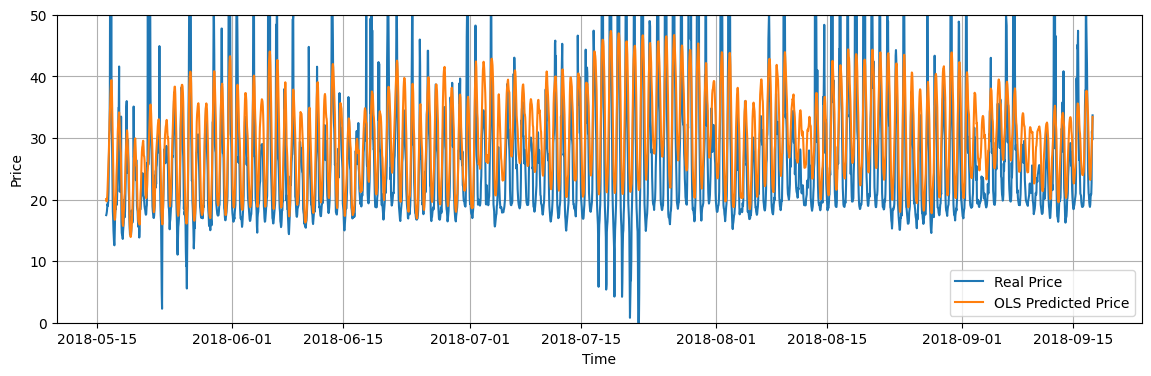

In [41]:
# Compare OLS predicted price with real price

plt.figure(figsize = (14, 4))
plt.xlabel("Time")
plt.ylabel("Price")
plt.plot(data_test['DATETIME'].iloc[1:], data_test['HB_NORTH (RTLMP)'].iloc[1:], label = 'Real Price')
plt.plot(data_test['DATETIME'].iloc[1:], y_pred_OLS, label = 'OLS Predicted Price')
plt.ylim(0, 50)
plt.legend()
plt.grid()

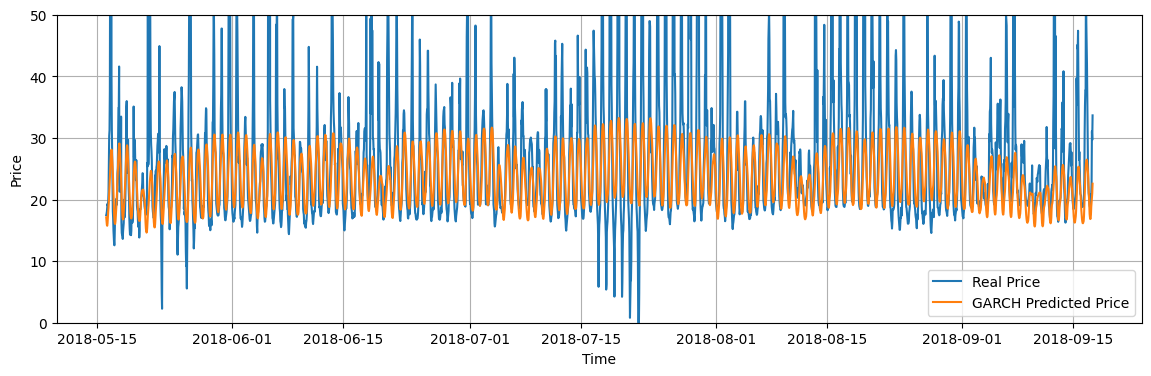

In [ ]:
# Compare GARCH predicted price with real price

plt.figure(figsize = (14, 4))
plt.xlabel("Time")
plt.ylabel("Price")
plt.plot(data_test['DATETIME'].iloc[1:], data_test['HB_NORTH (RTLMP)'].iloc[1:], label = 'Real Price')
plt.plot(data_test['DATETIME'].iloc[1:], y_pred_GARCH, label = 'GARCH Predicted Price')
plt.ylim(0, 50)
plt.legend()
plt.grid()

In [ ]:
# Calculate MSE

price_pred = pd.DataFrame([y_test, y_pred_OLS, y_pred_ARMA, y_pred_GARCH.values]).T
price_pred.columns = ['Real', 'OLS', 'ARMA', 'GARCH']
for method in ['OLS', 'ARMA', 'GARCH']: 
  price_pred[method+' MSE'] = (price_pred['Real'] - price_pred[method])**2
  print(method+' MSE: ', np.mean(price_pred[method+' MSE']))

OLS MSE:  3040.8380410248615
ARMA MSE:  3348.995360503033
GARCH MSE:  3213.4042339972075
